# Mars Datascrape
## Deliverable 2: Scrape and Analyze Mars Weather Data from Curiosity

In [1]:
# Import relevant libraries
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
my_service = Service(executable_path="C:\\Users\\hfatt\\Downloads\\chromedriver\\chromedriver.exe")
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html=browser.html
html_soup=BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
data_html = html_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
mars_temp = []
for row in data_html:
    td = row.find_all('td')
    row = [col.text for col in td]
    mars_temp.append(row)
    
mars_temp

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [11]:
browser.quit()

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_temp, columns=["id","terrestrial_date","sol","ls",
                                           "month","min_temp","pressure"])
#mars_df = mars_df.drop(["drop1","drop2","drop3","drop4","drop5","drop6","drop7","drop8"], axis=1)

mars_df = mars_df.set_index('id')

In [14]:
# Confirm DataFrame was created successfully
mars_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

In [15]:
# Examine data type of each column
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   terrestrial_date  1867 non-null   object
 1   sol               1867 non-null   object
 2   ls                1867 non-null   object
 3   month             1867 non-null   object
 4   min_temp          1867 non-null   object
 5   pressure          1867 non-null   object
dtypes: object(6)
memory usage: 102.1+ KB


In [16]:
# Change data types for data analysis
    # Change terrestrial_date to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], yearfirst=True, format="%Y/%m/%d")
mars_df.head()

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
    # Change sol, ls, month to int
    # Change min_temp, pressure to float

mars_df = mars_df.astype({'sol':'int64', 'ls':'int64', 'month':'int64', 'min_temp':'float', 'pressure':'float'})

In [18]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
mars_df['month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [20]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].max()

1977

In [21]:
# 3. What is the average low temperature by month?
mars_avg = mars_df.groupby('month').mean()
mars_avg_temp = mars_avg['min_temp']
mars_avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

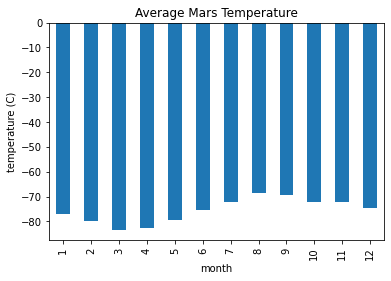

In [23]:
# Plot the average temperature by month
mars_temp_graph = mars_avg_temp.plot(kind='bar', title='Average Mars Temperature')
mars_temp_graph.set_xlabel('month')
mars_temp_graph.set_ylabel('temperature (C)')

plt.show()

In [24]:
# Identify the coldest and hottest months in Curiosity's location
mars_avg_temp.sort_values()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [25]:
# 4. Average pressure by Martian month
mars_avg_pressure = mars_avg['pressure']
mars_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

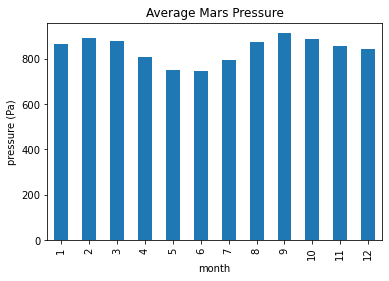

In [26]:
# Plot the average pressure by month
mars_pressure_graph = mars_avg_pressure.plot(kind='bar', title='Average Mars Pressure')
mars_pressure_graph.set_xlabel('month')
mars_pressure_graph.set_ylabel('pressure (Pa)')

plt.show()

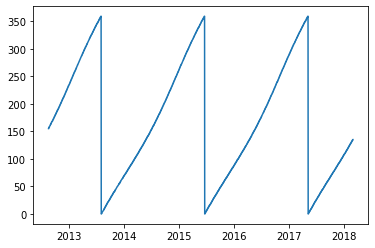

In [27]:
# 5. How many terrestrial (earth) days are there in a Martian year?
xaxis=mars_df['terrestrial_date']
yaxis=mars_df['ls']
mars_date_graph = plt.plot(xaxis, yaxis)
plt.show()

In [28]:
# Find the span of terrestrial dates that falls within one rull rotation of solar longitude (a solar longitude value to the same solar longitude value)
# The span was selected based on the graph above.
mars_year = mars_df.loc[(mars_df['terrestrial_date'] > "2013-01-01") & (mars_df['terrestrial_date'] <"2014-11-22")]
mars_year

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
52,2013-01-02,145,236,8,-64.0,909.0
53,2013-01-03,146,237,8,-65.0,908.0
54,2013-01-04,147,237,8,-65.0,914.0
55,2013-01-05,148,238,8,-65.0,912.0
56,2013-01-06,149,239,8,-65.0,914.0
...,...,...,...,...,...,...
754,2014-11-17,811,234,8,-71.0,900.0
755,2014-11-18,812,235,8,-75.0,902.0
756,2014-11-19,813,236,8,-67.0,904.0


There are 12 months on Mars. 

The dataset holds 1977 sols of data. 

On average, the third month on Mars has the coldest minimum temperature, and the eighth month is the warmest. 

Atmospheric pressure on Mars is, on average, lowest in the sixth month and highest in the ninth month.

A year on Mars is approximately 687 terrestrial days. This was calculated from the number of days between 1/2/2013 and 11/19/2014, two dates when Mars was at the same point of solar longitude (236). An internet search confirms this number.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv')